<a href="https://colab.research.google.com/github/BabluKD/Test/blob/master/Copy_of_FinalYearPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
 
data = pd.read_csv("/content/allCategories.csv")
 
X = data.drop(['Churn'], axis = 1)
y = data['Churn']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.1,
                                                    random_state=10)

In [ ]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
 
from sklearn.metrics import roc_curve, roc_auc_score
 
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(solver='liblinear', random_state=0), 
               GaussianNB(), 
               KNeighborsClassifier(n_neighbors=34), 
               lgb.LGBMClassifier(),
               SVC(C=4.0,kernel='linear'),
               DecisionTreeClassifier(random_state=71),
               RandomForestClassifier(random_state=7)]
 
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
 
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
 
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

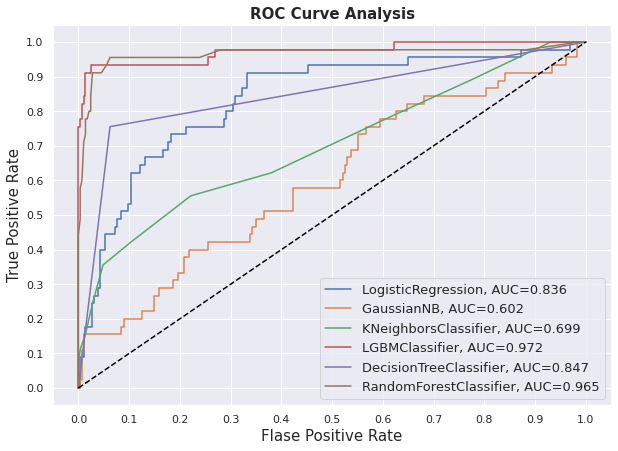

In [ ]:
fig = plt.figure(figsize=(10,7))
 
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='black', linestyle='--')
 
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)
 
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
 
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
 
plt.show()

In [ ]:
fig.savefig('multiple_roc_curve_allCat.png')